# Care Plan Recommendation - Collaborative Filtering Data Preparation

**Objective:** Prepare patient and care plan data for collaborative filtering algorithms to recommend personalized Alzheimer's care plans.

**Data Sources:**
- `alzheimers_disease_data.csv`: Patient health metrics
- `care_plan_recommendations.csv`: Care plan assignments

**Approach:**
1. Load and explore care plan data
2. Merge with patient data (using only Lasso-selected features from prediction model)
3. Encode categorical variables
4. Create user-item interaction matrix
5. Analyze sparsity and distribution
6. Save prepared datasets for collaborative filtering

**Features Used:** Only the 16 features selected by Lasso regression in the prediction notebook for optimal model performance.

## 1. Import Required Libraries

In [11]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning and preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Care Plan Recommendations

Loading the care plan assignment data to understand what care plans have been assigned to which patients.

In [12]:
# Load care plan recommendations
care_plans = pd.read_csv('data/care_plan_recommendations.csv')

print("=" * 70)
print("CARE PLAN DATA OVERVIEW")
print("=" * 70)
print(f"Total care plans: {len(care_plans)}")
print(f"Unique patients: {care_plans['PatientID'].nunique()}")
print(f"Unique care plan IDs: {care_plans['CarePlanID'].nunique()}")
print(f"\nDataset shape: {care_plans.shape}")
print(f"\nColumns: {care_plans.columns.tolist()}")
print(f"\nRisk Level Distribution:")
print(care_plans['RiskLevel'].value_counts())
print(f"\nPrimary Focus Distribution:")
print(care_plans['PrimaryFocus'].value_counts())

care_plans.head(10)

CARE PLAN DATA OVERVIEW
Total care plans: 2149
Unique patients: 2149
Unique care plan IDs: 2149

Dataset shape: (2149, 10)

Columns: ['CarePlanID', 'PatientID', 'RiskLevel', 'PrimaryFocus', 'CarePlanType', 'RecommendedActions', 'Frequency', 'AssignedTo', 'MonitoringIndicators', 'ReviewPeriod']

Risk Level Distribution:
RiskLevel
HIGH      1628
MEDIUM     269
LOW        252
Name: count, dtype: int64

Primary Focus Distribution:
PrimaryFocus
Daily Assistance     866
Cognitive Decline    853
Preventive Care      430
Name: count, dtype: int64


,CarePlanID,PatientID,RiskLevel,PrimaryFocus,CarePlanType,RecommendedActions,Frequency,AssignedTo,MonitoringIndicators,ReviewPeriod
0,CP4751,4751,HIGH,Daily Assistance,Personalized Alzheimer Care,ADL support; Structured daily routine; Nutriti...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
1,CP4752,4752,HIGH,Daily Assistance,Personalized Alzheimer Care,ADL support; Structured daily routine; Medicat...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
2,CP4753,4753,HIGH,Cognitive Decline,Personalized Alzheimer Care,Memory games; Orientation exercises,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
3,CP4754,4754,HIGH,Cognitive Decline,Personalized Alzheimer Care,Memory games; Orientation exercises; Behaviora...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
4,CP4755,4755,HIGH,Daily Assistance,Personalized Alzheimer Care,Memory games; Orientation exercises; ADL suppo...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
5,CP4756,4756,LOW,Preventive Care,Personalized Alzheimer Care,Nutrition monitoring; Blood glucose tracking,Weekly,Caregiver,"MMSE, ADL, Behavior",Monthly
6,CP4757,4757,HIGH,Cognitive Decline,Personalized Alzheimer Care,Memory games; Orientation exercises; Medicatio...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
7,CP4758,4758,HIGH,Cognitive Decline,Personalized Alzheimer Care,Memory games; Orientation exercises; Medicatio...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
8,CP4759,4759,HIGH,Daily Assistance,Personalized Alzheimer Care,ADL support; Structured daily routine; Blood p...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly
9,CP4760,4760,LOW,Preventive Care,Personalized Alzheimer Care,Behavioral therapy; Calming activities,Weekly,Caregiver,"MMSE, ADL, Behavior",Monthly


## 3. Load Patient Data with Selected Features

Loading patient health data and keeping **only the 16 features** selected by Lasso regression in the prediction model:

**Selected Features:**
1. Age
2. EducationLevel
3. Smoking
4. SleepQuality
5. CardiovascularDisease
6. HeadInjury
7. Hypertension
8. CholesterolLDL
9. CholesterolHDL
10. CholesterolTriglycerides
11. MMSE
12. FunctionalAssessment
13. MemoryComplaints
14. BehavioralProblems
15. ADL
16. Disorientation

*These features were identified as the most predictive in the Alzheimer's disease prediction model.*

In [13]:
# Load full patient dataset
df_full = pd.read_csv('data/alzheimers_disease_data.csv')

# Define the 16 features selected by Lasso (from prediction notebook)
selected_features = [
    'Age', 'EducationLevel', 'Smoking', 'SleepQuality',
    'CardiovascularDisease', 'HeadInjury', 'Hypertension',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
    'BehavioralProblems', 'ADL', 'Disorientation'
]

# Keep only PatientID, selected features, and Diagnosis
patient_data = df_full[['PatientID'] + selected_features + ['Diagnosis']].copy()

print("=" * 70)
print("PATIENT DATA WITH SELECTED FEATURES")
print("=" * 70)
print(f"Total patients: {len(patient_data)}")
print(f"Features retained: {len(selected_features)}")
print(f"Dataset shape: {patient_data.shape}")
print(f"\nFeatures: {selected_features}")
print(f"\nDiagnosis distribution:")
print(patient_data['Diagnosis'].value_counts())

patient_data.head()

PATIENT DATA WITH SELECTED FEATURES
Total patients: 2149
Features retained: 16
Dataset shape: (2149, 18)

Features: ['Age', 'EducationLevel', 'Smoking', 'SleepQuality', 'CardiovascularDisease', 'HeadInjury', 'Hypertension', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Disorientation']

Diagnosis distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


,PatientID,Age,EducationLevel,Smoking,SleepQuality,CardiovascularDisease,HeadInjury,Hypertension,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,Diagnosis
0,4751,73,2,0,9.025679,0,0,0,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0
1,4752,89,0,0,7.151293,0,0,0,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0
2,4753,73,1,0,9.673574,0,0,0,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,1,0
3,4754,74,1,1,8.392554,0,0,0,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0
4,4755,89,0,0,5.597238,0,0,0,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0


## 4. Merge Patient Features with Care Plans

Combining patient health metrics with assigned care plans to create a unified dataset for collaborative filtering.

In [14]:
# Merge patient features with care plan data
cf_data = care_plans.merge(patient_data, on='PatientID', how='inner')

print("=" * 70)
print("MERGED COLLABORATIVE FILTERING DATASET")
print("=" * 70)
print(f"Total records: {len(cf_data)}")
print(f"Total columns: {len(cf_data.columns)}")
print(f"Patients with care plans: {cf_data['PatientID'].nunique()}")
print(f"Care plans assigned: {cf_data['CarePlanID'].nunique()}")
print(f"\nDataset shape: {cf_data.shape}")
print(f"\nMissing values: {cf_data.isnull().sum().sum()}")

print(f"\nColumns breakdown:")
print(f"  - Care plan metadata: CarePlanID, RiskLevel, PrimaryFocus, CarePlanType, etc.")
print(f"  - Patient features (Lasso-selected): {len(selected_features)} features")
print(f"  - Target: Diagnosis")

cf_data.head()

MERGED COLLABORATIVE FILTERING DATASET
Total records: 2149
Total columns: 27
Patients with care plans: 2149
Care plans assigned: 2149

Dataset shape: (2149, 27)

Missing values: 170

Columns breakdown:
  - Care plan metadata: CarePlanID, RiskLevel, PrimaryFocus, CarePlanType, etc.
  - Patient features (Lasso-selected): 16 features
  - Target: Diagnosis


,CarePlanID,PatientID,RiskLevel,PrimaryFocus,CarePlanType,RecommendedActions,Frequency,AssignedTo,MonitoringIndicators,ReviewPeriod,Age,EducationLevel,Smoking,SleepQuality,CardiovascularDisease,HeadInjury,Hypertension,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,Diagnosis
0,CP4751,4751,HIGH,Daily Assistance,Personalized Alzheimer Care,ADL support; Structured daily routine; Nutriti...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly,73,2,0,9.025679,0,0,0,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0
1,CP4752,4752,HIGH,Daily Assistance,Personalized Alzheimer Care,ADL support; Structured daily routine; Medicat...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly,89,0,0,7.151293,0,0,0,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0
2,CP4753,4753,HIGH,Cognitive Decline,Personalized Alzheimer Care,Memory games; Orientation exercises,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly,73,1,0,9.673574,0,0,0,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,1,0
3,CP4754,4754,HIGH,Cognitive Decline,Personalized Alzheimer Care,Memory games; Orientation exercises; Behaviora...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly,74,1,1,8.392554,0,0,0,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0
4,CP4755,4755,HIGH,Daily Assistance,Personalized Alzheimer Care,Memory games; Orientation exercises; ADL suppo...,Daily,Caregiver,"MMSE, ADL, Behavior",Monthly,89,0,0,5.597238,0,0,0,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0


## 5. Encode Categorical Variables

Preparing categorical care plan features for machine learning by encoding them numerically.

In [15]:
# Create a copy for encoding
cf_dataset = cf_data.copy()

# Initialize label encoders
le_risk = LabelEncoder()
le_focus = LabelEncoder()
le_type = LabelEncoder()

# Encode categorical features
cf_dataset['RiskLevel_Encoded'] = le_risk.fit_transform(cf_dataset['RiskLevel'])
cf_dataset['PrimaryFocus_Encoded'] = le_focus.fit_transform(cf_dataset['PrimaryFocus'])
cf_dataset['CarePlanType_Encoded'] = le_type.fit_transform(cf_dataset['CarePlanType'])

# Create interaction column (all records represent patient-care plan assignments)
cf_dataset['Interaction'] = 1

# Store label mappings for interpretation
label_mappings = {
    'RiskLevel': dict(enumerate(le_risk.classes_)),
    'PrimaryFocus': dict(enumerate(le_focus.classes_)),
    'CarePlanType': dict(enumerate(le_type.classes_))
}

print("=" * 70)
print("CATEGORICAL ENCODING COMPLETE")
print("=" * 70)
print(f"\nLabel Encodings:")
for feature, mapping in label_mappings.items():
    print(f"\n{feature}:")
    for code, label in mapping.items():
        print(f"  {code} → {label}")

# Show sample of encoded data
cf_dataset[['PatientID', 'CarePlanID', 'RiskLevel', 'RiskLevel_Encoded', 
            'PrimaryFocus', 'PrimaryFocus_Encoded', 'Interaction']].head(10)

CATEGORICAL ENCODING COMPLETE

Label Encodings:

RiskLevel:
  0 → HIGH
  1 → LOW
  2 → MEDIUM

PrimaryFocus:
  0 → Cognitive Decline
  1 → Daily Assistance
  2 → Preventive Care

CarePlanType:
  0 → Personalized Alzheimer Care


,PatientID,CarePlanID,RiskLevel,RiskLevel_Encoded,PrimaryFocus,PrimaryFocus_Encoded,Interaction
0,4751,CP4751,HIGH,0,Daily Assistance,1,1
1,4752,CP4752,HIGH,0,Daily Assistance,1,1
2,4753,CP4753,HIGH,0,Cognitive Decline,0,1
3,4754,CP4754,HIGH,0,Cognitive Decline,0,1
4,4755,CP4755,HIGH,0,Daily Assistance,1,1
5,4756,CP4756,LOW,1,Preventive Care,2,1
6,4757,CP4757,HIGH,0,Cognitive Decline,0,1
7,4758,CP4758,HIGH,0,Cognitive Decline,0,1
8,4759,CP4759,HIGH,0,Daily Assistance,1,1
9,4760,CP4760,LOW,1,Preventive Care,2,1


## 6. Organize Collaborative Filtering Structure

Defining the structure for collaborative filtering:
- **User ID**: PatientID
- **Item ID**: CarePlanID
- **User Features**: 16 Lasso-selected patient health metrics
- **Item Features**: Encoded care plan characteristics
- **Interaction**: Binary indicator (1 = care plan assigned to patient)

In [16]:
# Define collaborative filtering components
user_id = 'PatientID'
item_id = 'CarePlanID'
interaction = 'Interaction'

# User features (patient health metrics - Lasso selected)
user_features = selected_features  # Already defined: 16 features

# Item features (care plan characteristics - encoded)
item_features = [
    'RiskLevel_Encoded',
    'PrimaryFocus_Encoded',
    'CarePlanType_Encoded'
]

# Keep original labels for interpretation
original_labels = ['RiskLevel', 'PrimaryFocus', 'CarePlanType', 'Diagnosis']

print("=" * 70)
print("COLLABORATIVE FILTERING DATASET STRUCTURE")
print("=" * 70)
print(f"\nUser ID: {user_id}")
print(f"Item ID: {item_id}")
print(f"Interaction: {interaction} (binary: 1 = care plan assigned)")

print(f"\nUser Features ({len(user_features)}):")
for i, feat in enumerate(user_features, 1):
    print(f"  {i:2d}. {feat}")

print(f"\nItem Features ({len(item_features)}):")
for i, feat in enumerate(item_features, 1):
    print(f"  {i}. {feat}")

print(f"\nOriginal Labels (for interpretation): {original_labels}")

print(f"\n" + "=" * 70)
print(f"Dataset ready for collaborative filtering algorithms!")
print("=" * 70)

COLLABORATIVE FILTERING DATASET STRUCTURE

User ID: PatientID
Item ID: CarePlanID
Interaction: Interaction (binary: 1 = care plan assigned)

User Features (16):
   1. Age
   2. EducationLevel
   3. Smoking
   4. SleepQuality
   5. CardiovascularDisease
   6. HeadInjury
   7. Hypertension
   8. CholesterolLDL
   9. CholesterolHDL
  10. CholesterolTriglycerides
  11. MMSE
  12. FunctionalAssessment
  13. MemoryComplaints
  14. BehavioralProblems
  15. ADL
  16. Disorientation

Item Features (3):
  1. RiskLevel_Encoded
  2. PrimaryFocus_Encoded
  3. CarePlanType_Encoded

Original Labels (for interpretation): ['RiskLevel', 'PrimaryFocus', 'CarePlanType', 'Diagnosis']

Dataset ready for collaborative filtering algorithms!


## 7. Analyze Data Distribution and Sparsity

Understanding the interaction matrix characteristics is crucial for selecting appropriate collaborative filtering algorithms.

In [17]:
# Calculate collaborative filtering metrics
n_users = cf_dataset['PatientID'].nunique()
n_items = cf_dataset['CarePlanID'].nunique()
n_interactions = len(cf_dataset)

# Calculate sparsity
total_possible_interactions = n_users * n_items
sparsity = 1 - (n_interactions / total_possible_interactions)
density = 1 - sparsity

# Analyze care plans per patient
care_plans_per_patient = cf_dataset.groupby('PatientID').size()

# Analyze patients per care plan
patients_per_care_plan = cf_dataset.groupby('CarePlanID').size()

print("=" * 70)
print("COLLABORATIVE FILTERING METRICS")
print("=" * 70)

print(f"\nUser-Item Matrix Dimensions:")
print(f"  Users (patients):        {n_users:,}")
print(f"  Items (care plans):      {n_items:,}")
print(f"  Total interactions:      {n_interactions:,}")

print(f"\nSparsity Analysis:")
print(f"  Possible interactions:   {total_possible_interactions:,}")
print(f"  Actual interactions:     {n_interactions:,}")
print(f"  Sparsity:                {sparsity:.4%}")
print(f"  Density:                 {density:.4%}")

print(f"\nInteraction Distribution:")
print(f"  Care plans per patient:")
print(f"    Mean:   {care_plans_per_patient.mean():.2f}")
print(f"    Median: {care_plans_per_patient.median():.0f}")
print(f"    Min:    {care_plans_per_patient.min()}")
print(f"    Max:    {care_plans_per_patient.max()}")

print(f"\n  Patients per care plan:")
print(f"    Mean:   {patients_per_care_plan.mean():.2f}")
print(f"    Median: {patients_per_care_plan.median():.0f}")
print(f"    Min:    {patients_per_care_plan.min()}")
print(f"    Max:    {patients_per_care_plan.max()}")

print(f"\nRisk Level Distribution:")
for level, count in cf_dataset['RiskLevel'].value_counts().items():
    print(f"  {level:8s}: {count:4d} ({count/len(cf_dataset)*100:.1f}%)")

print(f"\nPrimary Focus Distribution:")
for focus, count in cf_dataset['PrimaryFocus'].value_counts().items():
    print(f"  {focus:20s}: {count:4d} ({count/len(cf_dataset)*100:.1f}%)")

COLLABORATIVE FILTERING METRICS

User-Item Matrix Dimensions:
  Users (patients):        2,149
  Items (care plans):      2,149
  Total interactions:      2,149

Sparsity Analysis:
  Possible interactions:   4,618,201
  Actual interactions:     2,149
  Sparsity:                99.9535%
  Density:                 0.0465%

Interaction Distribution:
  Care plans per patient:
    Mean:   1.00
    Median: 1
    Min:    1
    Max:    1

  Patients per care plan:
    Mean:   1.00
    Median: 1
    Min:    1
    Max:    1

Risk Level Distribution:
  HIGH    : 1628 (75.8%)
  MEDIUM  :  269 (12.5%)
  LOW     :  252 (11.7%)

Primary Focus Distribution:
  Daily Assistance    :  866 (40.3%)
  Cognitive Decline   :  853 (39.7%)
  Preventive Care     :  430 (20.0%)


## 8. Visualize Data Distribution

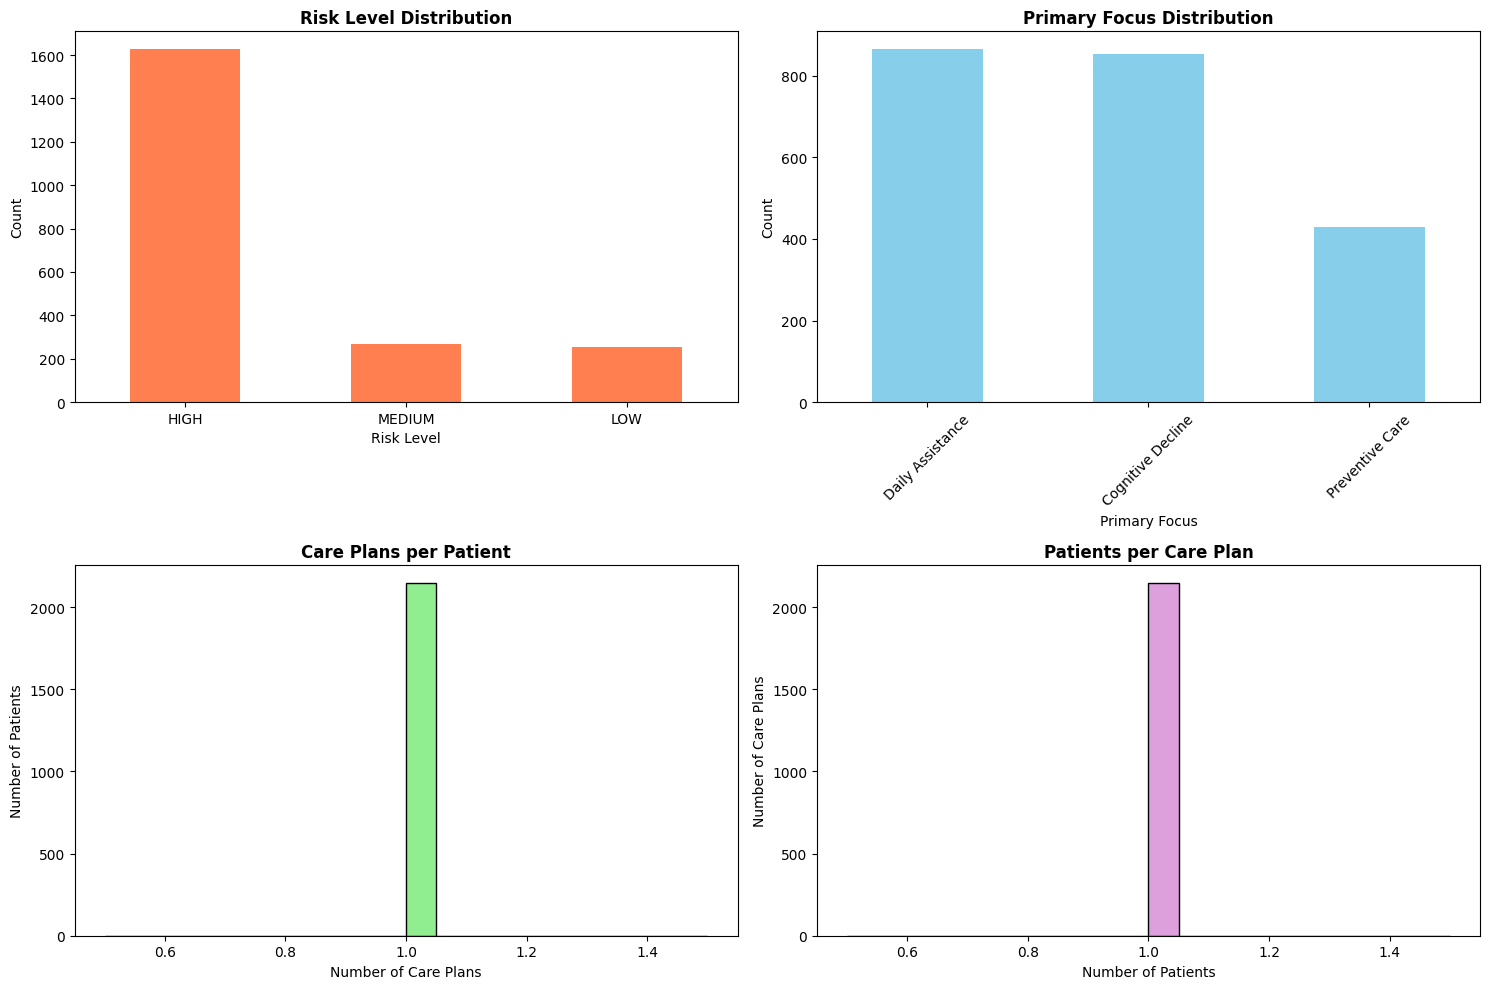

✓ Visualizations generated


In [18]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Risk Level Distribution
cf_dataset['RiskLevel'].value_counts().plot(kind='bar', ax=axes[0, 0], color='coral')
axes[0, 0].set_title('Risk Level Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Risk Level')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Primary Focus Distribution
cf_dataset['PrimaryFocus'].value_counts().plot(kind='bar', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Primary Focus Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Primary Focus')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Care Plans per Patient
axes[1, 0].hist(care_plans_per_patient, bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Care Plans per Patient', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Care Plans')
axes[1, 0].set_ylabel('Number of Patients')

# 4. Patients per Care Plan
axes[1, 1].hist(patients_per_care_plan, bins=20, color='plum', edgecolor='black')
axes[1, 1].set_title('Patients per Care Plan', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Patients')
axes[1, 1].set_ylabel('Number of Care Plans')

plt.tight_layout()
plt.show()

print(f"✓ Visualizations generated")

## 9. Save Prepared Datasets

Saving two versions of the dataset:
1. **Full dataset**: All columns including original labels and encoded features
2. **Compact dataset**: Essential columns only for CF algorithms

In [19]:
# Save full dataset with all columns
cf_dataset.to_csv('data/cf_care_plan_data.csv', index=False)

# Create compact version with only essential columns for CF
essential_columns = (
    [user_id, item_id, interaction] +
    user_features +
    item_features +
    original_labels
)

cf_compact = cf_dataset[essential_columns].copy()
cf_compact.to_csv('data/cf_care_plan_compact.csv', index=False)

print("=" * 70)
print("DATASETS SAVED SUCCESSFULLY")
print("=" * 70)

print(f"\n1. Full Dataset:")
print(f"   File:    data/cf_care_plan_data.csv")
print(f"   Shape:   {cf_dataset.shape}")
print(f"   Columns: {len(cf_dataset.columns)}")
print(f"   Purpose: Complete data with all original and encoded features")

print(f"\n2. Compact Dataset:")
print(f"   File:    data/cf_care_plan_compact.csv")
print(f"   Shape:   {cf_compact.shape}")
print(f"   Columns: {len(cf_compact.columns)}")
print(f"   Purpose: Essential features only for CF algorithms")

print(f"\n" + "=" * 70)
print("COLLABORATIVE FILTERING DATA PREPARATION COMPLETE!")
print("=" * 70)

print(f"\nDataset Summary:")
print(f"  • {n_users:,} unique patients (users)")
print(f"  • {n_items:,} unique care plans (items)")
print(f"  • {n_interactions:,} patient-care plan interactions")
print(f"  • {len(user_features)} patient health features (Lasso-selected)")
print(f"  • {len(item_features)} care plan features (encoded)")
print(f"  • Sparsity: {sparsity:.2%}")

print(f"\nRecommended Collaborative Filtering Algorithms:")
print(f"  1. Matrix Factorization (SVD, NMF)")
print(f"  2. Neural Collaborative Filtering (NCF)")
print(f"  3. LightFM (hybrid recommender)")
print(f"  4. Surprise library (SVD, KNN)")
print(f"  5. Deep Learning (TensorFlow Recommenders)")

print(f"\n✓ Ready for model training!")

DATASETS SAVED SUCCESSFULLY

1. Full Dataset:
   File:    data/cf_care_plan_data.csv
   Shape:   (2149, 31)
   Columns: 31
   Purpose: Complete data with all original and encoded features

2. Compact Dataset:
   File:    data/cf_care_plan_compact.csv
   Shape:   (2149, 26)
   Columns: 26
   Purpose: Essential features only for CF algorithms

COLLABORATIVE FILTERING DATA PREPARATION COMPLETE!

Dataset Summary:
  • 2,149 unique patients (users)
  • 2,149 unique care plans (items)
  • 2,149 patient-care plan interactions
  • 16 patient health features (Lasso-selected)
  • 3 care plan features (encoded)
  • Sparsity: 99.95%

Recommended Collaborative Filtering Algorithms:
  1. Matrix Factorization (SVD, NMF)
  2. Neural Collaborative Filtering (NCF)
  3. LightFM (hybrid recommender)
  4. Surprise library (SVD, KNN)
  5. Deep Learning (TensorFlow Recommenders)

✓ Ready for model training!


## 10. Preview Prepared Data

Final preview of the compact dataset structure ready for collaborative filtering.

In [20]:
# Display sample of compact dataset
print("=" * 70)
print("COMPACT DATASET PREVIEW (First 10 Rows)")
print("=" * 70)
print(f"\nColumns: {cf_compact.columns.tolist()}")
print(f"\nSample data:")

# Show first 10 rows with key columns
display_cols = [user_id, item_id, interaction] + user_features[:5] + item_features + ['RiskLevel', 'PrimaryFocus']
cf_compact[display_cols].head(10)

COMPACT DATASET PREVIEW (First 10 Rows)

Columns: ['PatientID', 'CarePlanID', 'Interaction', 'Age', 'EducationLevel', 'Smoking', 'SleepQuality', 'CardiovascularDisease', 'HeadInjury', 'Hypertension', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Disorientation', 'RiskLevel_Encoded', 'PrimaryFocus_Encoded', 'CarePlanType_Encoded', 'RiskLevel', 'PrimaryFocus', 'CarePlanType', 'Diagnosis']

Sample data:


,PatientID,CarePlanID,Interaction,Age,EducationLevel,Smoking,SleepQuality,CardiovascularDisease,RiskLevel_Encoded,PrimaryFocus_Encoded,CarePlanType_Encoded,RiskLevel,PrimaryFocus
0,4751,CP4751,1,73,2,0,9.025679,0,0,1,0,HIGH,Daily Assistance
1,4752,CP4752,1,89,0,0,7.151293,0,0,1,0,HIGH,Daily Assistance
2,4753,CP4753,1,73,1,0,9.673574,0,0,0,0,HIGH,Cognitive Decline
3,4754,CP4754,1,74,1,1,8.392554,0,0,0,0,HIGH,Cognitive Decline
4,4755,CP4755,1,89,0,0,5.597238,0,0,1,0,HIGH,Daily Assistance
5,4756,CP4756,1,86,1,0,7.261953,0,1,2,0,LOW,Preventive Care
6,4757,CP4757,1,68,2,1,5.477686,0,0,0,0,HIGH,Cognitive Decline
7,4758,CP4758,1,75,1,0,4.213210,0,0,0,0,HIGH,Cognitive Decline
8,4759,CP4759,1,72,0,0,5.748224,0,0,1,0,HIGH,Daily Assistance
9,4760,CP4760,1,87,0,1,7.551773,1,1,2,0,LOW,Preventive Care
